#### Predicting Home Prices in Banglore

In [185]:
import pandas as pd

https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

In [186]:
df = pd.read_csv('db/Bengaluru_House_Data.csv')

In [187]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [188]:
df.shape

(13320, 9)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [190]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [191]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [192]:
df.drop(['area_type', 'availability', 'society'], axis = 'columns', inplace = True)

In [193]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [194]:
df.balcony.describe()

count    12711.000000
mean         1.584376
std          0.817263
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [195]:
df.balcony.value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [196]:
import math

In [197]:
df.balcony.fillna(math.floor(df.balcony.mean()), inplace = True)

In [198]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [199]:
df.bath.describe()

count    13247.000000
mean         2.692610
std          1.341458
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [200]:
df.bath.value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [201]:
df.bath.fillna(math.floor(df.bath.mean()), inplace = True)

In [202]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [203]:
df.dropna(inplace = True)

In [204]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [205]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [206]:
def convert_size(size):
    return int(size.split(' ')[0])

In [207]:
df['BHK'] = df['size'].apply(convert_size)

In [208]:
df.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [209]:
df.drop('size', axis = 'columns', inplace = True)

In [210]:
df.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [211]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [212]:
df.total_sqft.value_counts()

total_sqft
1200    843
1100    221
1500    204
2400    195
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2110, dtype: int64

In [213]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [214]:
df[~df['total_sqft'].apply(is_float)]

,location,total_sqft,bath,balcony,price,BHK
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,1.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,1.0,224.500,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13240,Devanahalli,1020 - 1130,2.0,1.0,52.570,1
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [215]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [216]:
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()]

In [217]:
df.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [218]:
df.describe()

,total_sqft,bath,balcony,price,BHK
count,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000
mean,1558.809175,2.688165,1.559629,112.471981,2.802670
std,1238.478935,1.336799,0.807475,149.092716,1.292117
min,1.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,1275.000000,2.000000,2.000000,72.000000,3.000000
75%,1680.000000,3.000000,2.000000,120.000000,3.000000
max,52272.000000,40.000000,3.000000,3600.000000,43.000000


In [219]:
df.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
dtype: int64

In [220]:
df['price_per_sqft'] = df.total_sqft * 100000 / df.price

In [221]:
df.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,2.702841e+06
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,2.166667e+06
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,2.322581e+06
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,1.601053e+06
4,Kothanur,1200.0,2.0,1.0,51.00,2,2.352941e+06


In [222]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000,1.325700e+04
mean,1558.809175,2.688165,1.559629,112.471981,2.802670,1.887598e+06
std,1238.478935,1.336799,0.807475,149.092716,1.292117,9.234337e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,8.333333e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,1.367368e+06
50%,1275.000000,2.000000,2.000000,72.000000,3.000000,1.838710e+06
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,2.341270e+06
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,3.733714e+07


In [223]:
df.location.describe()

count          13257
unique          1298
top       Whitefield
freq             537
Name: location, dtype: object

In [224]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df.location.value_counts(ascending=False)

In [225]:
location_stats

location
Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [226]:
len(location_stats[location_stats>10])

240

In [227]:
len(location_stats[location_stats<=10])

1047

In [228]:
min_location = location_stats[location_stats<=10]
min_location

location
Sadashiva Nagar              10
BTM 1st Stage                10
Nagadevanahalli              10
Sector 1 HSR Layout          10
Basapura                     10
                             ..
Nagarbhavi  BDA Complex       1
Rajanna Layout                1
1 Ramamurthy Nagar            1
Lakshmipura Vidyaanyapura     1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [229]:
df.location = df.location.apply(lambda x: 'other' if x in min_location else x)

In [230]:
df.location.describe()

count     13257
unique      241
top       other
freq       2873
Name: location, dtype: object

In [231]:
df.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,2.702841e+06
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,2.166667e+06
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,2.322581e+06
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,1.601053e+06
4,Kothanur,1200.0,2.0,1.0,51.00,2,2.352941e+06


In [232]:
df = df[(df.total_sqft / df.BHK >= 300)]

In [233]:
df.shape

(12513, 7)

In [234]:
import numpy as np

In [235]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [236]:
df = remove_pps_outliers(df)

In [237]:
df.shape

(9419, 7)

In [238]:
import matplotlib.pyplot as plt
import matplotlib

In [239]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (10,8)
    plt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue',label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = '+', color = 'green',label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

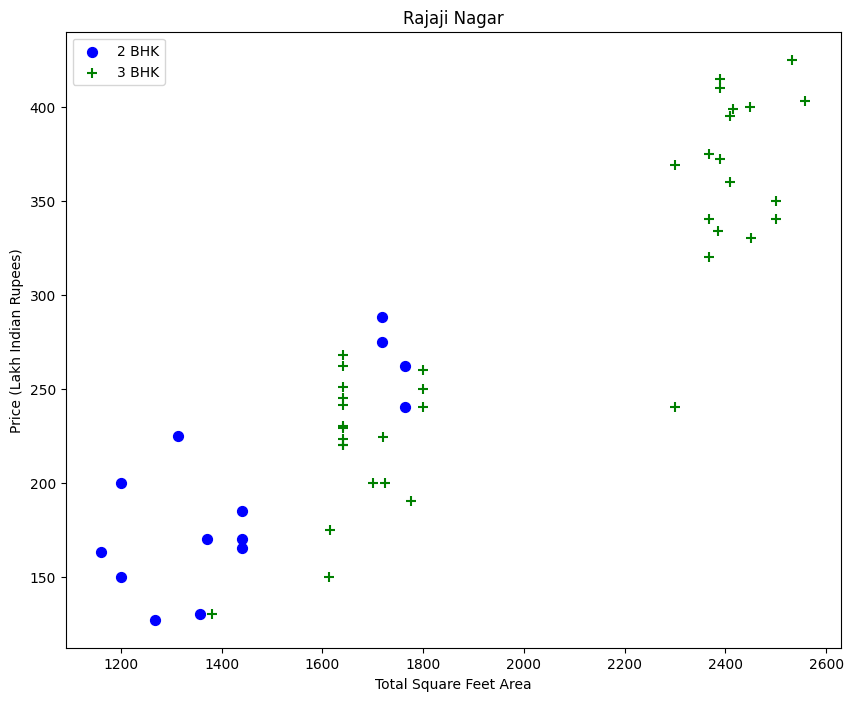

In [240]:
plot_scatter_chart(df,"Rajaji Nagar")

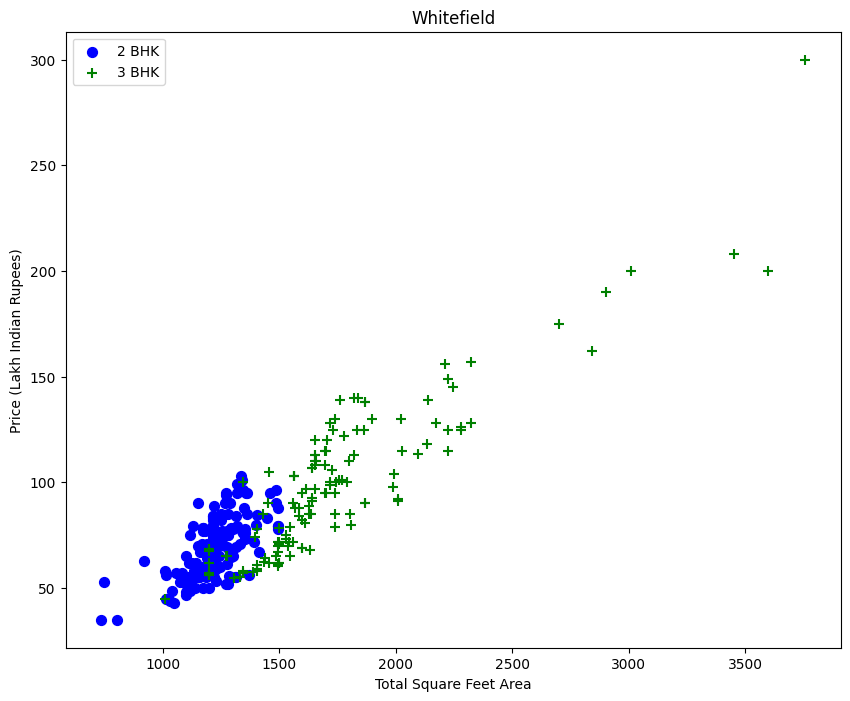

In [241]:
plot_scatter_chart(df,"Whitefield")

In [242]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [243]:
df = remove_bhk_outliers(df)

In [244]:
df.shape

(6153, 7)

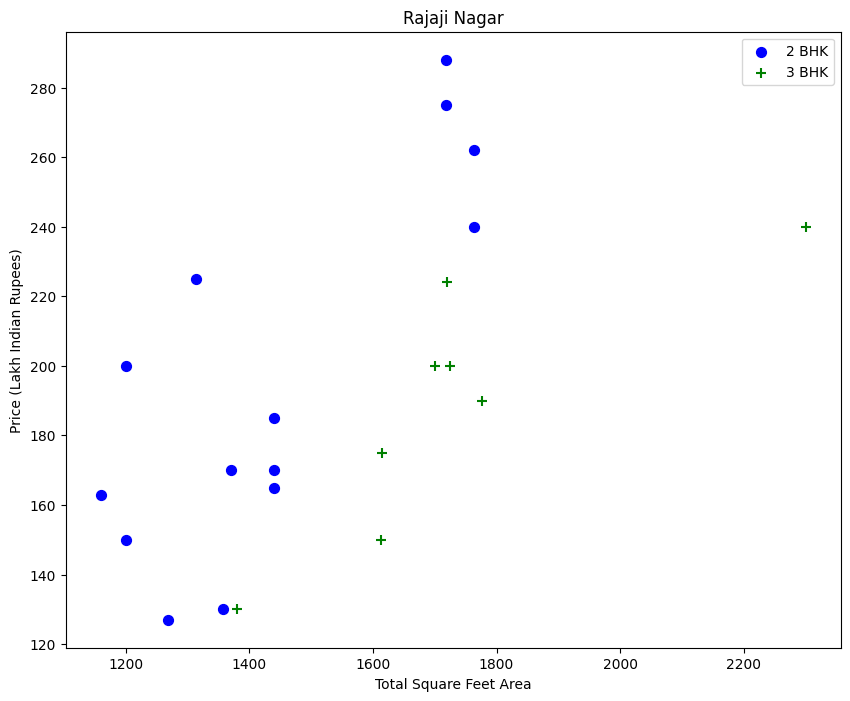

In [245]:
plot_scatter_chart(df,"Rajaji Nagar")

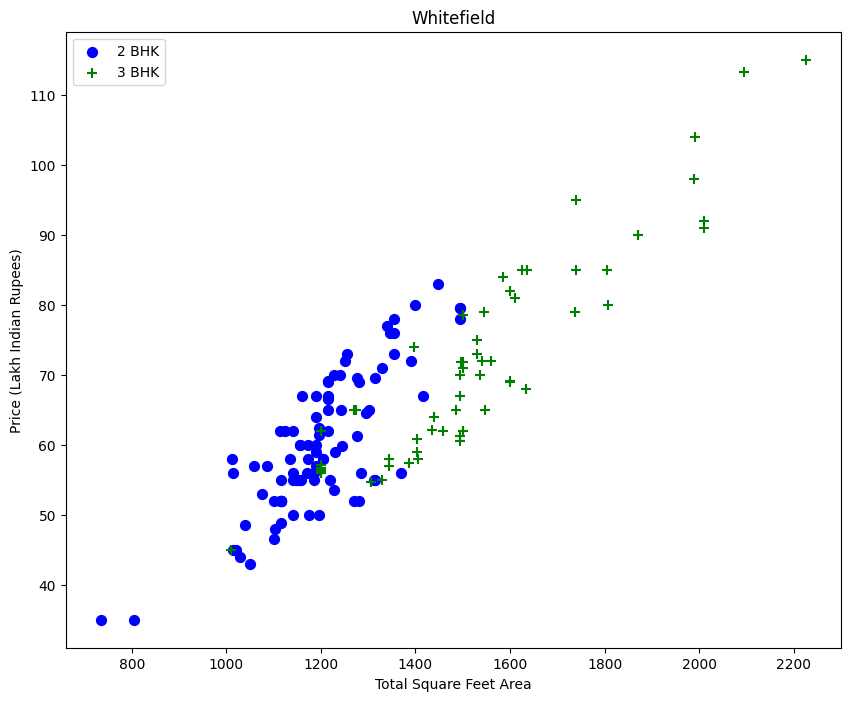

In [246]:
plot_scatter_chart(df,"Whitefield")

Text(0, 0.5, 'Count')

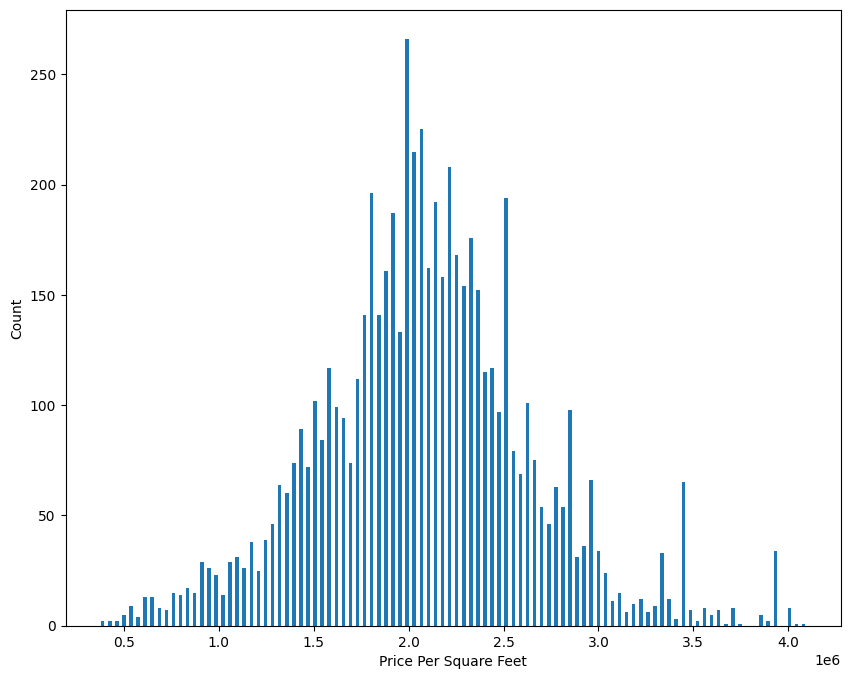

In [247]:
plt.hist(df.price_per_sqft, bins = 100, rwidth = 0.5)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [248]:
df.price_per_sqft.skew()

0.23265446981030088

Text(0, 0.5, 'Count')

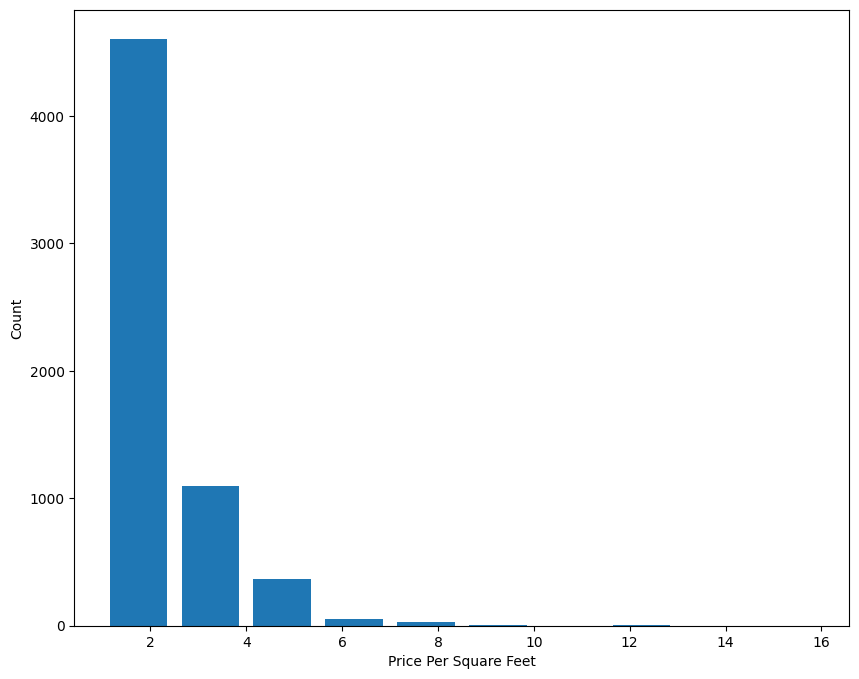

In [249]:
plt.hist(df.bath, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [250]:
df.bath.skew()

3.1542436801340177

In [251]:
df[df.bath > 10]

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
4743,Neeladri Nagar,4000.0,12.0,1.0,160.0,10,2.500000e+06
7713,other,12000.0,12.0,1.0,525.0,10,2.285714e+06
7796,other,10000.0,16.0,1.0,550.0,16,1.818182e+06
8826,other,5425.0,13.0,0.0,275.0,13,1.972727e+06


In [252]:
df[df.bath>df.BHK]

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
21,1st Phase JP Nagar,2615.0,5.0,3.0,222.0,4,1.177928e+06
32,2nd Stage Nagarbhavi,3000.0,8.0,3.0,451.0,6,6.651885e+05
33,2nd Stage Nagarbhavi,2400.0,8.0,3.0,450.0,6,5.333333e+05
44,5th Phase JP Nagar,1150.0,3.0,3.0,52.5,2,2.190476e+06
107,7th Phase JP Nagar,3300.0,4.0,3.0,160.0,3,2.062500e+06
...,...,...,...,...,...,...,...
9072,other,5100.0,7.0,1.0,225.0,6,2.266667e+06
9118,other,3200.0,4.0,2.0,140.0,3,2.285714e+06
9274,other,1300.0,3.0,1.0,65.0,2,2.000000e+06
9306,other,5000.0,5.0,1.0,250.0,4,2.000000e+06


In [253]:
df = df[df.bath <= df.BHK]

In [254]:
df.shape

(5897, 7)

In [255]:
df.drop(['price_per_sqft'], axis = 'columns', inplace = True)

In [256]:
df.head()

,location,total_sqft,bath,balcony,price,BHK
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [257]:
dummies = pd.get_dummies(df.location)

In [258]:
dummies = dummies.astype(int)

In [259]:
df = pd.concat([df, dummies.drop('other',axis='columns')],axis='columns')

In [260]:
df.head()

,location,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
X = df.drop(['location', 'price'], axis = 'columns')
y = df.price

In [262]:
X

,total_sqft,bath,balcony,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9411,1800.0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9413,1095.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9414,1256.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9416,1440.0,2.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [263]:
from sklearn.model_selection import train_test_split

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [265]:
from sklearn.linear_model import LinearRegression

In [266]:
lr = LinearRegression()

In [267]:
lr.fit(X_train, y_train)

LinearRegression()

In [268]:
lr.score(X_train, y_train)

0.9186142690667078

In [269]:
lr.score(X_test, y_test)

0.7370784700670401

In [270]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [271]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2, 3],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.854503,{}
1,lasso,0.620761,"{'alpha': 3, 'selection': 'random'}"
2,decision_tree,0.758863,"{'criterion': 'squared_error', 'splitter': 'be..."


In [272]:
def predict_price(location, sqft, bath, balcony, bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [274]:
predict_price('1st Phase JP Nagar',1000, 2, 2, 3)

c:\Users\Ankita Banerjee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


101.43024775222537

In [275]:
predict_price('Indira Nagar',1000, 2, 2, 4)

c:\Users\Ankita Banerjee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


104.4621793328546

In [276]:
import pickle
with open('banglore_home_price_prediction_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [277]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))